# TOTEM USE CASE

In [2]:
# Importation des librairies 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Prise de Notes

### Analyse de Forme : 
- Lignes et colonnes : 1811 et 15
- Types de variable : 3 quantitatives, 7 qualitatives et 5 dont on ne tiendra pas compte dans cette analyse (car redondantes ou pas intéressantes)
- Analyse des valeurs manquantes : 61% des produits n'ont pas de nutriscore 

### Analyse de Fond :
- Problème dans la colonne nutriscore : le score est écrit en majuscule ou en minuscule, ce qui crée plus de catégories
- Moment de la journée où il y a le plus d'achat : autour de 13h (logique car heure du déjeuner) mais il y a tout de même des achats tout au long de la journée
- L'extreme majorité des produits plait beaucoup (avec une moyenne de 4.25/5 attribuée par les clients) cependant quelques 0/5 (peut-être incidents rencontrés avec certains produits ?)
- 2 organizationId => ce dataset concerne les opérations effectuées dans 2 magasins (avec 69% d'achat dans le 1er magasin contre 31% dans le second).
- Les achats sont répartis plutôt uniformément tout au long de la semaine mais on remarque tout de même une augmentation croissante (de 17% le lundi à 22% le vendredi).
- Les plats représentent plus d'1/4 des achats tandis que les boissons fraîches et les snacks sont minoritaires (15% et 17% => lié au fait que ce soit la periode hivernale les gens préfèrent consommer des plats et boissons chaudes)
- Près de 2/3 (63%) des produits achetés ont un nutriscore supérieur ou égal à B

### Analyse plus détaillée :
- La note de 0 a été attribuée 65 fois dont 45 fois sur des snacks individuels et 11 fois sur des produits dont le nutriscore etait disponible et inferieur ou égal à D
- Les produits bio sont en moyenne mieux notés (4.81/5 contre 4.19/5) et les desserts et entrée bio coûtent moins cher (attention ici les produits bio coûtent moins cher en moyenne car il n'y a pas de plat bio, or les plats sont les produits les plus chers) 
- Les produits vegans coûtent en moyenne moins cher (2,07€ contre 3,17€) mais sont moins bien notés (3,93/5 contre 4.3/5
- Les produits made in france coûtent plus cher pour toutes les catégories de produits mais sont en moyenne mieux notés (4.28/5 contre 4.16/5).


## Lecture du fichier xlsx

In [3]:
data = pd.read_excel('dataset_stage_data_analytics.xlsx')
data.head()

,transactionId,organizationId,userId,transaction_date,transaction_hour,transaction_day_of_week,productId,product_price_in_euros,product_rating,product_is_bio,product_is_made_in_france,product_is_vegan,product_category_id,product_category_name,product_nutriscore
0,0,734116177bdc841eee69b50f4473bcdb,90ec88e848624dedeaf26ba674e3432d,2021-01-06T10:00:00,10.0,Wednesday,60206273255ce27486c2eeaf14302742,3.0,4.0,False,True,False,6669360d03ea7dc60e40cdb906e05ced,Entrées,NaN
1,1,68d5360852db85dbbec879986b718e08,0652b92e4488e4fbb0a57cbbd8331004,2021-02-19T12:00:00,12.0,Friday,55e573d02e1b4032a9cde29cb9167d96,3.0,5.0,False,True,False,e73ddac97df34064e7960bbaea1dab33,Desserts,NaN
2,2,734116177bdc841eee69b50f4473bcdb,24654995b33ec871705d73d9929fbbe7,2021-01-23T14:00:00,14.0,Saturday,60c48c5211d4016331387c99ea3222ee,1.0,4.0,False,False,False,893b2f48522acf235d4a6d23c078392a,Snacks Individuels,NaN
3,3,68d5360852db85dbbec879986b718e08,582242a74e8f6b6e5c2d7807e2f0be38,2021-02-10T10:00:00,10.0,Wednesday,1a40b882e3cbbce1d3f6e5b8d6929509,7.0,4.0,False,True,False,bf7cf1616b4eae23dd6bd6cc8aaa6369,Plats,NaN
4,4,734116177bdc841eee69b50f4473bcdb,c8371e35ef59783e84b723877f3d9c66,2021-01-27T09:00:00,9.0,Wednesday,3b726bd8d1899684f8741a470ec7b51e,1.0,4.0,True,False,True,893b2f48522acf235d4a6d23c078392a,Snacks Individuels,NaN


In [4]:
# copie du tableau pandas pour travailler dessus
df = data.copy()

## Analyse de Forme

In [5]:
df.shape

(1811, 15)

In [6]:
df.dtypes.value_counts()

object     8
bool       3
float64    3
int64      1
dtype: int64

In [48]:
# Analyse des NaN
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

transactionId                0.000000
organizationId               0.000000
transaction_hour             0.000000
transaction_day_of_week      0.000000
product_price_in_euros       0.000000
product_rating               0.000000
product_is_bio               0.000000
product_is_made_in_france    0.000000
product_is_vegan             0.000000
product_category_name        0.000000
product_nutriscore           0.614578
dtype: float64

## Analyse de Fond

### Elimination des colonnes qui ne nous intéressent pas

In [8]:
df = df.drop(['userId', 'productId','product_category_id','transaction_date'],axis=1)

### Visualisation des variables quantitatives

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

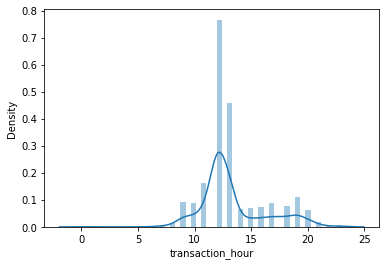

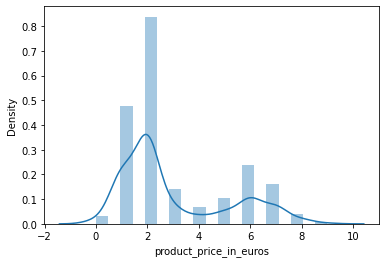

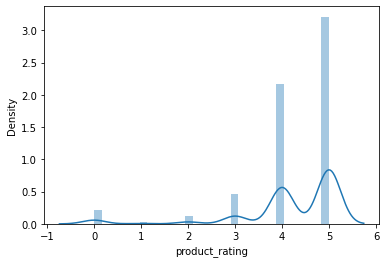

In [9]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

In [46]:
df.select_dtypes('float').describe()

,transaction_hour,product_price_in_euros,product_rating
count,1811.000000,1811.000000,1811.000000
mean,13.297073,2.999448,4.248482
std,2.906287,2.128600,1.104532
min,0.000000,0.000000,0.000000
25%,12.000000,2.000000,4.000000
50%,12.000000,2.000000,5.000000
75%,14.000000,5.000000,5.000000
max,23.000000,9.000000,5.000000


### Visualisation des variables qualitatives

In [10]:
# création d'un sous ensemble pour les variables qualitatives
Quali = df.drop(['transactionId','transaction_hour','product_price_in_euros','product_rating'],axis=1)

In [11]:
for col in Quali:
    print(f'{col :-<50} {df[col].unique()}')

organizationId------------------------------------ ['734116177bdc841eee69b50f4473bcdb' '68d5360852db85dbbec879986b718e08']
transaction_day_of_week--------------------------- ['Wednesday' 'Friday' 'Saturday' 'Tuesday' 'Monday' 'Thursday' 'Sunday']
product_is_bio------------------------------------ [False  True]
product_is_made_in_france------------------------- [ True False]
product_is_vegan---------------------------------- [False  True]
product_category_name----------------------------- ['Entrées' 'Desserts' 'Snacks Individuels' 'Plats' 'Boissons Fraîches']
product_nutriscore-------------------------------- [nan 'B' 'A' 'D' 'E' 'C' 'a' 'd' 'e' 'c' 'b']


In [47]:
# Correction de la colonne product_nutriscore
df['product_nutriscore']=df['product_nutriscore'].str.upper()

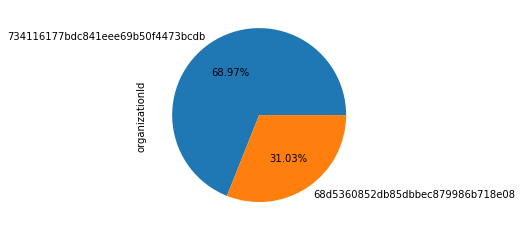

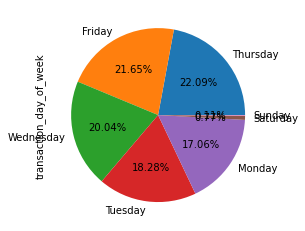

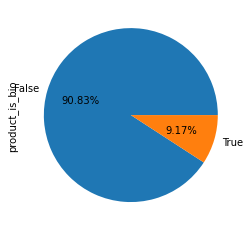

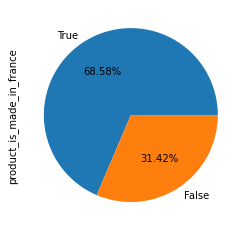

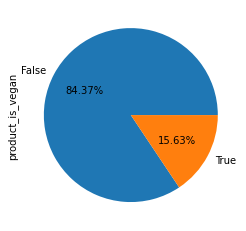

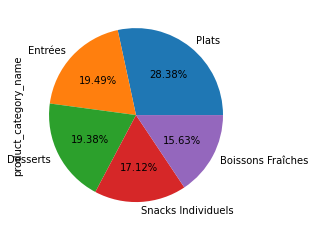

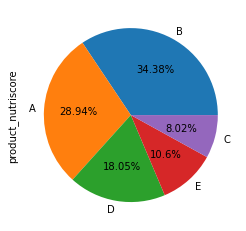

In [78]:
# Visualisation des variables qualitatives
for col in Quali:
    plt.figure()
    df[col].value_counts().plot.pie(autopct = lambda x: str(round(x, 2)) + '%')

## Analyse plus détaillée

#### Analyse des produits notés 0/5

In [76]:
df[df['product_rating'] == 0]['product_category_name'].value_counts()

Snacks Individuels    45
Desserts              12
Boissons Fraîches      6
Plats                  2
Name: product_category_name, dtype: int64

In [77]:
df[df['product_rating'] == 0]['product_nutriscore'].value_counts()

D    7
E    4
B    1
A    1
C    1
Name: product_nutriscore, dtype: int64

#### Impact des produits bio

In [86]:
df1 = df.drop(['transactionId','transaction_hour','product_is_made_in_france','product_is_vegan'],axis=1)

In [96]:
df1.groupby(['product_is_bio']).mean()

,product_price_in_euros,product_rating
product_is_bio,,
False,3.142857,4.191489
True,1.578313,4.813253


In [87]:
df1.groupby(['product_is_bio','product_category_name']).mean()

product_price_in_euros  product_rating
product_is_bio product_category_name                                        
False          Boissons Fraîches                    1.419890        4.403315
               Desserts                             1.975831        4.205438
               Entrées                              2.443114        4.476048
               Plats                                6.068093        4.151751
               Snacks Individuels                   1.136842        3.778947
True           Boissons Fraîches                    1.637255        4.803922
               Desserts                             1.000000        5.000000
               Entrées                              2.000000        5.000000
               Snacks Individuels                   1.480000        4.560000

#### Impact des produits vegan

In [88]:
df2 = df.drop(['transactionId','transaction_hour','product_is_made_in_france','product_is_bio'],axis=1)

In [95]:
df2.groupby(['product_is_vegan']).mean()

,product_price_in_euros,product_rating
product_is_vegan,,
False,3.170157,4.305628
True,2.077739,3.939929


In [89]:
df2.groupby(['product_is_vegan','product_category_name']).mean()

product_price_in_euros  product_rating
product_is_vegan product_category_name                                        
False            Boissons Fraîches                    1.300546        4.633880
                 Desserts                             1.917404        4.268437
                 Entrées                              2.525000        4.528571
                 Plats                                6.088115        4.211066
                 Snacks Individuels                   1.168067        4.037815
True             Boissons Fraîches                    1.860000        4.390000
                 Desserts                             2.000000        3.750000
                 Entrées                              2.013699        4.410959
                 Plats                                5.692308        3.038462
                 Snacks Individuels                   1.152778        3.194444

#### Impact des produits made in France

In [90]:
df3 = df.drop(['transactionId','transaction_hour','product_is_vegan','product_is_bio'],axis=1)

In [94]:
df3.groupby(['product_is_made_in_france']).mean()

,product_price_in_euros,product_rating
product_is_made_in_france,,
False,1.666081,4.166960
True,3.610306,4.285829


In [93]:
df3.groupby(['product_is_made_in_france','product_category_name']).mean()

product_price_in_euros  \
product_is_made_in_france product_category_name                           
False                     Boissons Fraîches                    1.440217   
                          Desserts                             1.654867   
                          Entrées                              2.000000   
                          Plats                                5.340426   
                          Snacks Individuels                   1.084821   
True                      Boissons Fraîches                    1.606061   
                          Desserts                             2.046218   
                          Entrées                              2.420455   
                          Plats                                6.141328   
                          Snacks Individuels                   1.372093   

                                                 product_rating  
product_is_made_in_france product_category_name                  
False                     Boissons Fraîches            4.576087  
                          Desserts                     4.530973  
                          Entrées                      5.000000  
                          Plats                        3.872340  
                          Snacks Individuels           3.705357  
True                      Boissons Fraîches            4.494949  
                          Desserts                     4.117647  
                          Entrées                      4.502841  
                          Plats                        4.179872  
                          Snacks Individuels           4.197674

#### Rafik AKIL